# Overview

In this assignment you will learn how to make advanced plots in python **and** Mathematica.  After looking over both codes, you will clearly see that one software is the better choice (just for advanced plots... simpler plots are pretty straightforward in python).

***
## Problem Statement

Plot the electric field created by an electric dipole with $q = 16$ nC and $s = 0.5$ m in a 2D plane the contains the charges.
***


1. Execute the code and verify that the plot looks right. Take a few minutes and try to understand how the code works.  Admittedly, it's a pretty complicated code and I wouldn't expect you to understand everything.  But do your best.  Try to add at least 10 comments.
2. [Here](https://drive.google.com/file/d/1t3THyYgCT0-kIDuM1T0D0w9qIeCPfFMq/view?usp=sharing) you will find a Mathematica notebook that solves the same problem.  Run the code (you have to have Mathematica installed on your machine first. See [here](https://byui.instructure.com/courses/106862/pages/getting-mathematica) for instructions on how to do that.) and see if you can understand how it works.  Which code is simpler?
3. Now pick one of the codes and modify it to add a third point charge ($q = +8.0 $nC) located at $ \vec{r} = 0.5 \hat{i} + 0 \hat{j}$ m

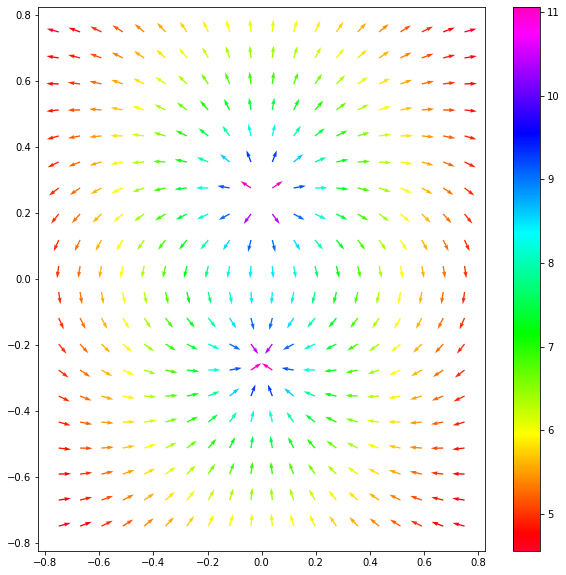

In [1]:
from numpy import meshgrid, linspace,array,log
from numpy.linalg import norm
from matplotlib import pyplot

def dipole(r):
    k = 8.99e9;
    q = 16e-9
    d = 0.5
    rPlus = r - array([0,d/2])
    rMinus = r - array([0,-d/2])
    EplusX = k * q/norm(rPlus)**2 * rPlus[0]/norm(rPlus)
    EplusY = k * q/norm(rPlus)**2 * rPlus[1]/norm(rPlus)
    EminusX = -k * q/norm(rMinus)**2 * rMinus[0]/norm(rMinus)
    EminusY = -k * q/norm(rMinus)**2 * rMinus[1]/norm(rMinus)
    Ex = EplusX + EminusX
    Ey = EplusY + EminusY
    return array([Ex,Ey])
    

Nx = 20
Ny = 20
X,Y = meshgrid(linspace(-0.75,0.75,Nx),linspace(-0.75,0.75,Ny))
xpoints = X.reshape(Nx**2)
ypoints = Y.reshape(Ny**2)

Evecs = array([dipole(array([x,ypoints[idx]])) for idx,x in enumerate(xpoints)])
Ex = Evecs[:,0]/array([norm(x) for x in Evecs])
Ey = Evecs[:,1]/array([norm(x) for x in Evecs])

pyplot.figure(figsize = (10,10))
pyplot.quiver(xpoints,ypoints,Ex,Ey,[log(norm(x)) for x in Evecs],cmap='gist_rainbow')
pyplot.colorbar()

pyplot.show()



